<a href="https://colab.research.google.com/github/jiangzhen3s/learnDeepLearning/blob/main/play_the_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [41]:
class cb(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.99):
      self.model.stop_training=True


In [42]:
mnist = tf.keras.datasets.mnist

In [55]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

(28, 28)
(60000,)
5


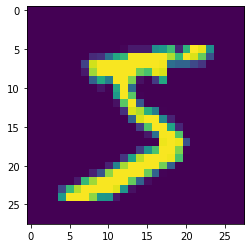

In [56]:
print(x_train[0].shape)
print(y_train.shape)
plt.imshow(x_train[0])
print(y_train[0])

0.0


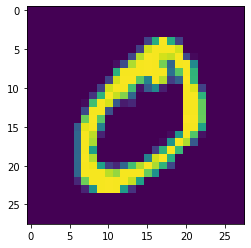

In [54]:
plt.imshow(x_train[1])
print(y_train[1])

In [57]:

x_train = x_train/255.0
x_test = x_test/255.0

In [58]:
model  =  keras.models.Sequential([
                                   keras.layers.Flatten(),
                                   keras.layers.Dense(64,activation='relu'),
                                   keras.layers.Dense(10,activation='softmax')
])

In [59]:
model.compile(optimizer='adam',
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy']
              )

In [60]:
_cb = cb()
model.fit(x_train,y_train,epochs=5,callbacks=[_cb])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5007 - accuracy: 0.8582
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1623 - accuracy: 0.9514
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1119 - accuracy: 0.9682
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0849 - accuracy: 0.9749
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0665 - accuracy: 0.9803


In [61]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0873 - accuracy: 0.9712


[0.08727757632732391, 0.9711999893188477]

7


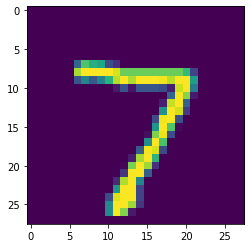

In [67]:
print(np.argmax(model.predict(x_test)[0]))
plt.imshow(x_test[0])